### Titanic Dataframe

#### Informacion del dataset
* Survival - Survival (0 = No; 1 = Yes). 
* Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* Name - Name
* Sex - Sex
* Age - Age
* Sibsp - Number of Siblings/Spouses Aboard
* Parch - Number of Parents/Children Aboard
* Ticket - Ticket Number
* Fare - Passenger Fare
* Cabin - Cabin
* Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [1]:
#! pip install pydotplus

In [2]:
# **** Importacion de librerias ****
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn import tree
from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set()

### Que problemas queremos resolver
Determinar si un pasajero del titanic sobrevivo conociendo los datos de embarcacion y sus caracteristicas

### 1. Carga de la data

In [3]:
test_df = pd.read_csv("data/test.csv")
train_df = pd.read_csv("data/train.csv")

In [4]:
#conocemos los primeros datos de train
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#conocemos los tipos de datos
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#visualizamos si hay datos nulos / NA
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
porc_nan = pd.DataFrame(train_df.isna().sum().sort_values(ascending=False) / len(train_df)*100, columns=['% de datos faltantes'])

In [8]:
porc_nan

,% de datos faltantes
Cabin,77.104377
Age,19.865320
Embarked,0.224467
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
SibSp,0.000000
Parch,0.000000


 con lo anterior podemos decir que en la columna Cabin tenemos el 77% de datos faltantes, en Age el 19% y en Embarked tan solo el 0.2%

### Analisis de variables univariadas

<b>Variables categoricas:</b>
* Survived
* Sex
* Pclass
* Embarked
* Cabin
* Ticket
* SibSp
* Parch
* Name

<b>Variables numericas:</b>
* PassengerId 
* Age 
* Fare

In [9]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Abbott, Mrs. Stanton (Rosa Hunt)",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Variables Categoricas

In [10]:
def bar(var_df):
    
    #get feature
    var = train_df[var_df] 
    
    #count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("frequencia")
    plt.title(var_df)
    plt.show()
    print("{}: \n {}".format(var_df,varValue))

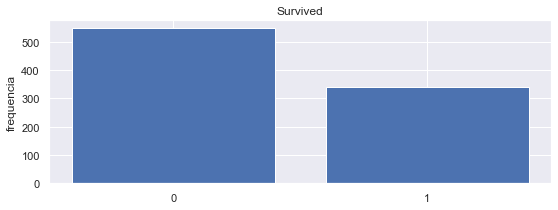

Survived: 
 0    549
1    342
Name: Survived, dtype: int64


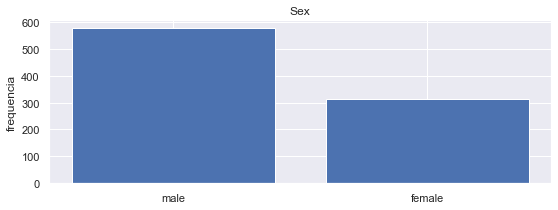

Sex: 
 male      577
female    314
Name: Sex, dtype: int64


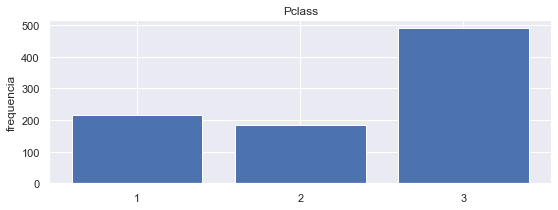

Pclass: 
 3    491
1    216
2    184
Name: Pclass, dtype: int64


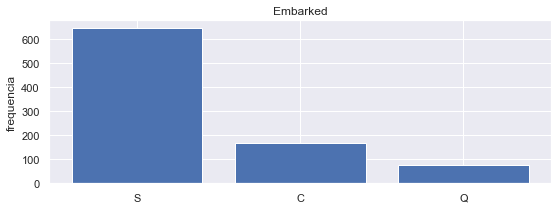

Embarked: 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


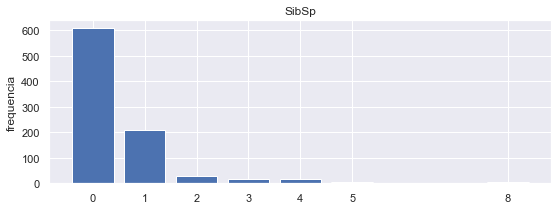

SibSp: 
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


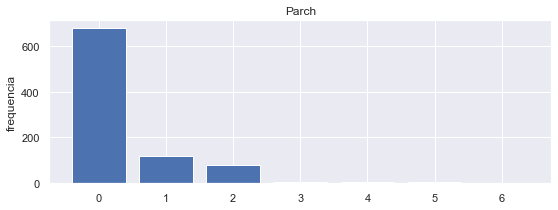

Parch: 
 0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64


In [11]:
categoricas = ["Survived", "Sex", "Pclass", "Embarked", "SibSp", "Parch"]
for i in categoricas: 
    bar(i)

### Variables numericas

In [12]:
def histograma(var_df): 
    
    plt.figure(figsize = (9,3))
    plt.hist(train_df[var_df], bins = 50) 
    plt.xlabel(var_df)
    plt.ylabel("Frequencia")
    plt.title("{} distribucion con histograma".format(var_df))
    plt.show()

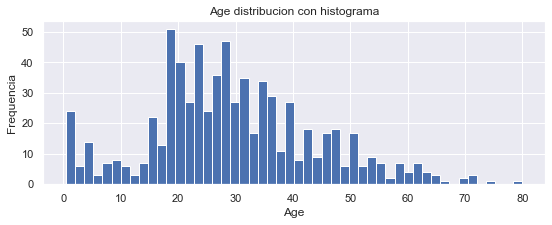

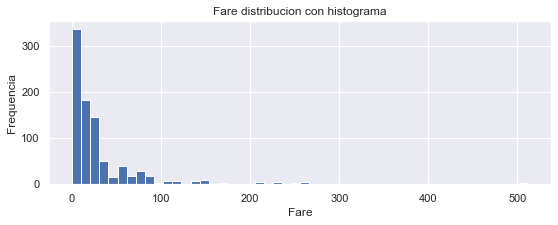

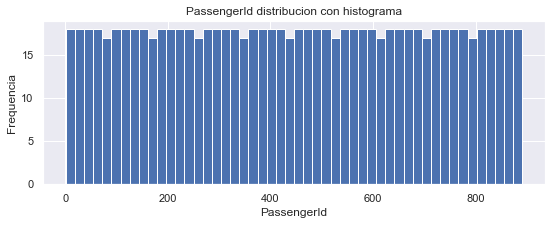

In [13]:
numericas = ['Age', 'Fare', 'PassengerId']
for i in numericas:
    histograma(i)

### 2. Preparacion de datos

In [14]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [15]:
#empezaremos por eliminar variables que no aportan valor en nuestro analisis
train_predictores = train_df.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis = 1)

In [16]:
#ahora tenemos un dataset con las variables de interes
#vamos a transformar Age a un dato numerico

encoder_sex = label_encoder.fit_transform(train_predictores['Sex'])

In [17]:
train_predictores['Sex'] = encoder_sex

In [18]:
train_predictores.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,S
1,1,0,38.0,1,0,71.2833,C
2,3,0,26.0,0,0,7.9250,S
3,1,0,35.0,1,0,53.1000,S
4,3,1,35.0,0,0,8.0500,S


In [19]:
#Ahora vamos a realizar preprocessing a las variables que hallamos con valores faltantes

#llenamos esos valores con la mediana, esta no nos afectara a comparacion con la media
train_predictores['Age'] = train_predictores['Age'].fillna(train_predictores['Age'].median())

#llenamos con la embarcancion S, pues esta embarcacion fue la mas frecuente en nuestro analisis visual
train_predictores['Embarked'] = train_predictores['Embarked'].fillna('S')

In [20]:
train_predictores.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [21]:
train_predictores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int32  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    object 
dtypes: float64(2), int32(1), int64(3), object(1)
memory usage: 45.4+ KB


In [22]:
#codificamos las variables numericas
dummy_encoded_train_predictors = pd.get_dummies(train_predictores)

In [23]:
dummy_encoded_train_predictors

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,7.2500,0,0,1
1,1,0,38.0,1,0,71.2833,1,0,0
2,3,0,26.0,0,0,7.9250,0,0,1
3,1,0,35.0,1,0,53.1000,0,0,1
4,3,1,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,0,0,1
887,1,0,19.0,0,0,30.0000,0,0,1
888,3,0,28.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


### 3. Modelo Arbol de decisiones

In [24]:
y = train_df['Survived'].values
X = dummy_encoded_train_predictors.values

In [25]:
#Dividemos nuestra data
x_train , x_test, y_train , y_test  = train_test_split(X, y, test_size = .25, random_state = 1)

In [26]:
#defino el modelo
tree_one = tree.DecisionTreeClassifier()
tree_one = tree_one.fit(x_train, y_train)

In [27]:
#Evaluo el modelo
tree_one_accuracy = round(tree_one.score(x_test, y_test), 4)
print('Accuracy: %0.4f' % (tree_one_accuracy))

Accuracy: 0.7578


In [28]:
from io import StringIO 
from IPython.display import Image, display
import pydotplus

out = StringIO()
tree.export_graphviz(tree_one, out_file = out)

graph = pydotplus.graph_from_dot_data(out.getvalue())
graph.write_png('titanic.png')

True